In [67]:
import pandas as pd
import numpy as np
import os

In [6]:
fldr = "C:/D/Projects/Vancouver/nhts"

In [52]:
trips = pd.read_csv(os.path.join(fldr, 'trippub.csv'))[['STRTTIME', 'WTTRDFIN']]

In [53]:
strttm = trips.STRTTIME.astype(str).str.pad(width=4, side='left', fillchar='0')
minutes = strttm.str[-2:].astype(int)
hours = strttm.str[:-2].astype(int)
strtmnt = hours * 60 + minutes
trips = trips.assign(start_minute=strtmnt)

In [54]:
trips
#trips.groupby(['start_minute']).sum()[['WTTRDFIN']]

,STRTTIME,WTTRDFIN,start_minute
0,1000,75441.905796,600
1,1510,75441.905796,910
2,700,71932.645806,420
3,1800,71932.645806,1080
4,845,80122.686739,525
5,1430,80122.686739,870
6,1115,23062.857428,675
7,2330,23062.857428,1410
8,550,21522.690513,350
9,700,21522.690513,420


In [89]:
departure_time_dist = trips.groupby(['start_minute']).sum()[['WTTRDFIN']].reset_index()

cmplt = pd.DataFrame({'start_minute': np.arange(24 * 60), 'WTTRDFIN':[0] * 24 * 60})
departure_time_dist = pd.concat([departure_time_dist, cmplt], ignore_index=True)
departure_time_dist = departure_time_dist.groupby(['start_minute']).sum()[['WTTRDFIN']]
dtd = departure_time_dist.rolling(window=60).mean()
dtd.fillna(1).to_csv(os.path.join(fldr, 'dtc_dist.csv'))

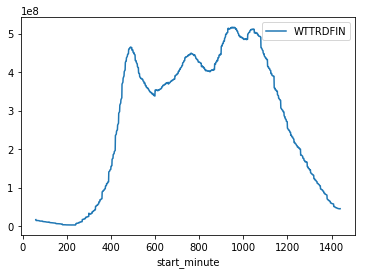

In [84]:

dtd.plot()

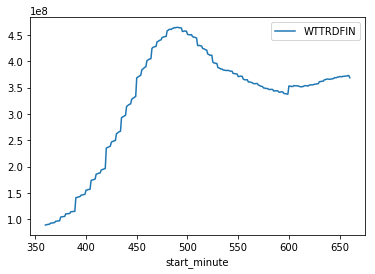

In [86]:
dtd.loc[360:660].plot()